In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [2]:
def custom_scatterplot(
    df: pd.DataFrame,
    dataframes: dict[str, pd.DataFrame],
    path_to_save: str,
    small_fontsize: int = 14, 
    medium_fontsize: int = 18,
    large_fontsize: int = 20,
    legend_params: dict = dict(
        loc="upper right", bbox_to_anchor=(1.2, 0.6), title="Stationarity test"
    ),
) -> None:
    values1 = df["left"].values.reshape(-1)
    values2 = df["right"].values.reshape(-1)

    # make a scatterplot from the dataframe df, where on the x axis you have left, on the y you have right
    # and the color is determined by the test name
    # make a list of markers
    markers = ["o", "v", "s", "D"]

    # set seaborn style
    sns.set_style("darkgrid")

    # # set latex font
    plt.rcParams["mathtext.fontset"] = "stix"
    plt.rcParams["font.family"] = "STIXGeneral"

    # increase font size
    # increase font size
    plt.rc('font', size=small_fontsize)          # controls default text sizes
    plt.rc('axes', titlesize=medium_fontsize)     # fontsize of the axes title
    plt.rc('axes', labelsize=large_fontsize)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=small_fontsize)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=small_fontsize)    # fontsize of the tick labels
    plt.rc('legend', fontsize=medium_fontsize)    # legend fontsize
    plt.rc('figure', titlesize=large_fontsize)  # fontsize of the figure title
    plt.rcParams.update({"font.size": medium_fontsize})

    # get a color palette
    palette = sns.color_palette("colorblind", n_colors=4)

    fig, axs = plt.subplots(
        2,
        2,
        figsize=(7, 5),
        gridspec_kw={"height_ratios": [10, 1], "width_ratios": [1, 10]},
    )
    plt.tight_layout()

    for marker, col, (test_name, df) in zip(markers, palette, dataframes.items()):
        sns.scatterplot(
            data=df,
            x="left",
            y="right",
            label=test_name,
            marker=marker,
            s=50,
            alpha=0.6,
            color=col,
            ax=axs[0, 1]
        )

    axs[1, 0].axis("off")

    sns.kdeplot(
        x=values1,
        bw_method=0.5,
        color='black',
        fill=True,
        linewidth=1,
        ax=axs[1, 1],
    )
    sns.rugplot(
        x=values1,
        height=0.22,
        color="black",
        alpha=0.2,
        linewidth=2,
        ax=axs[1, 1],
    )
    axs[1, 1].set_xlabel("P-value, left")
    axs[0, 1].set_xlim(-0.05, 1.05)
    axs[1, 1].set_xlim(-0.05, 1.05)
    axs[0, 1].set_xticklabels([])
    axs[1, 1].set_yticklabels([])
    axs[0, 1].set_yticklabels([])
    axs[0, 1].set_ylabel(None)
    axs[1, 1].set_ylabel(None)

    axs[0, 0].invert_xaxis()
    axs[1, 1].invert_yaxis()
    sns.kdeplot(
        y=values2,
        bw_method=0.5,
        color='black',
        fill=True,
        linewidth=1,
        ax=axs[0, 0],
    )
    sns.rugplot(
        y=values2,
        height=0.22,
        color="black",
        alpha=0.2,
        linewidth=2,
        ax=axs[0, 0],
    )
    axs[0, 0].set_ylabel("P-value, right")
    axs[0, 1].set_ylim(-0.05, 1.05)
    axs[0, 0].set_ylim(-0.05, 1.05)
    axs[0, 0].set_xlabel(None)
    axs[0, 0].set_xticklabels([])


    axs[0, 1].grid(False)
    # axs[0, 1].set_title("P-values for stationarity tests")
    plt.subplots_adjust(wspace=0.04, hspace=0.04)

    for ax in axs:
        for ax2 in ax:
            ax2.set_anchor("W")
    # plt.savefig("visualizations/test.pdf")
    axs[0,1].grid(True)
    # draw one vertical lines at 0.05
    axs[0,1].axvline(0.05, color="black", linestyle="--")
    # draw one horizontal line at 0.05
    axs[0,1].axhline(0.05, color="black", linestyle="--")

    # leg.get_title().set_text('Stationarity test')
    # draw a rectangle around the points that are significant for both sides
    axs[0,1].add_patch(
        patches.Rectangle(
            (-0.05, -0.05), 0.1, 0.1, fill=True, linestyle="none", color="red", alpha=0.2
        ),
    )
    axs[0,1].legend(**legend_params)
    plt.savefig(path_to_save, bbox_inches="tight")
    plt.show()


# USILaughs

In [3]:
left_pp = [0.24, 0.048, 0.77, 0.6, 0.58, 0.57, 0.39, 0.0031, 0.027, 0.68, 0.14, 0.89, 0.52, 1, 0.99, 0.56, 0.76, 1, 1, 0.006, 0.9, 1,0.99, 0.13, 0.0011, 0.89, 1, 0.65, 0.83, 0.99, 0.56, 0.052]
right_pp = [0.26, 0.12, 0.84, 0.95, 0.58, 0.65, 0.95, 0.98, 0.0023, 0.92, 0.55, 0.97, 0.41, 0.81, 0.14, 0.58, 0.078, 0.0036, 0.81, 0.86, 0.58, 1, 0.88, 0.42, 0.0012, 0.069, 1, 1, 0.22, 1, 0.24, 0.15]

left_kpss = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 0.96, 1, 1]
right_kpss = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

left_dfgls = [0.14, 1, 0.53, 0.072, 0.99, 0.87, 0.98, 0.77, 0.74, 0.65, 1, 0.55, 0.14, 0.95, 0.23, 0.36, 0.095, 0.87, 0.014, 1, 0.27, 0.96, 0.066, 1, 0.96, 1, 0.036, 0.87, 0.52, 0.0014, 0.71, 0.95]
right_dfgls =[0.17, 1, 0.58, 0.21, 0.99, 1, 0.85, 0.22, 1, 0.86, 0.77, 0.2, 0.37, 0.74, 0.94, 0.44, 0.4, 0.99, 1, 0.61, 0.31, 0.84, 0.076, 1, 0.99, 1, 0.57, 0.0009, 0.76, 0.82, 0.44, 0.98]

left_adf = [0.45, 0.0068, 0.73, 0.71, 0.67, 0.42, 0.28, 0.001, 0.084, 0.77, 0.27, 0.76, 0.8, 1, 0.91, 0.51, 0.81, 1,1, 0.0099, 0.79, 1, 0.98, 0.24, 0.0012, 1, 0.99, 0.63, 0.54, 0.98, 0.36, 0.066]
right_adf = [0.41, 0.12, 0.76, 0.93, 0.63, 0.94, 0.89, 0.76, 0.0026, 0.51, 0.42, 0.88, 0.44, 0.73, 0.022, 0.89, 0.13, 0.004, 0.96, 0.84, 0.44, 1, 0.79, 0.48, 0.00093, 0.011, 0.97, 1, 0.047, 1, 0.14, 0.19]

# make dataframe with multi index columns. First level should be left/right, and second level test name
df = pd.DataFrame([left_pp, right_pp, left_kpss, right_kpss, left_dfgls, right_dfgls, left_adf, right_adf]).T
# make the multi index from tuples, where first you have the side and then the test name
df.columns = pd.MultiIndex.from_tuples([('left', 'pp'), ('right', 'pp'), ('left', 'kpss'), ('right', 'kpss'), ('left', 'dfgls'), ('right', 'dfgls'), ('left', 'adf'), ('right', 'adf')])
# sort by the first level of the multi index
df = df.sort_index(axis=1, level=0)

# make a separate dataframe for each test type
pp = df.xs('pp', axis=1, level=1)
kpss = df.xs('kpss', axis=1, level=1)
dfgls = df.xs('dfgls', axis=1, level=1)
adf = df.xs('adf', axis=1, level=1)

dataframes: dict[str, pd.DataFrame] = {'Philip-Perron': pp, 'KPSS': kpss, 'DFGLS': dfgls, 'ADF': adf}

In [20]:
left_p_val_sig = ((df > 0.05)['left'].sum(axis=1) > 0).sum()/len(df)
right_p_val_sig = ((df > 0.05)['right'].sum(axis=1) > 0).sum()/len(df)
print(f'Percentage of timeseries with p-value that is for all tests <0.05, left side EDA: {1-left_p_val_sig}%')
print(f'Percentage of timeseries with p-value that is for all tests <0.05, right side EDA: {1-right_p_val_sig}%')

Percentage of timeseries with p-value that is for all tests <0.05, left side EDA: 0.0%
Percentage of timeseries with p-value that is for all tests <0.05, right side EDA: 0.0%


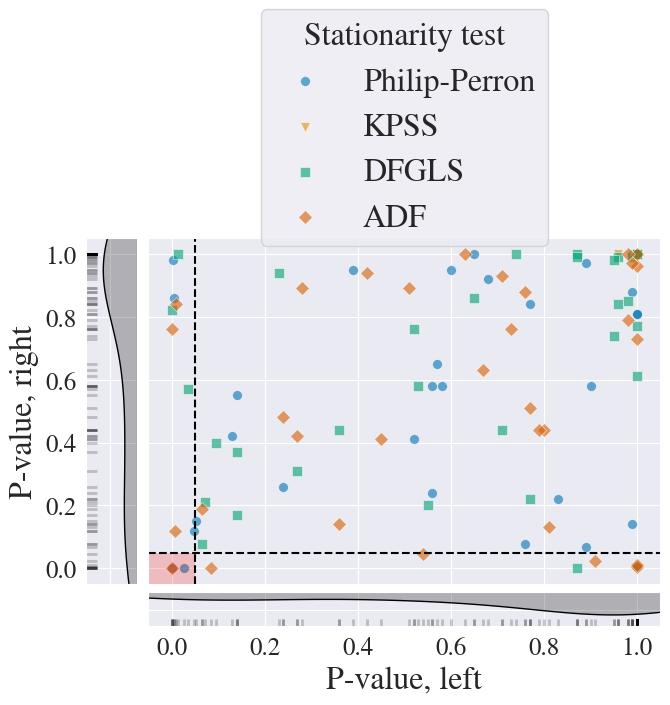

In [26]:
custom_scatterplot(
    df=df,
    dataframes=dataframes,
    path_to_save="../final_visualizations/stationarity_tests-usilaughs.pdf",
    small_fontsize=18,
    medium_fontsize=23,
    large_fontsize=28,
    legend_params=dict(
        loc="center", bbox_to_anchor=(0.5, 1.32), title="Stationarity test"
    ),
)


# MWC 2022

In [21]:
pp = pd.read_csv(
    "../test_results/PhillipsPerron_pvalues_mwc2022.csv", index_col=0, header=[0, 1]
).T
kpss = pd.read_csv(
    "../test_results/KPSS_pvalues_mwc2022.csv", index_col=0, header=[0, 1]
).T
dfgls = pd.read_csv(
    "../test_results/DFGLS_pvalues_mwc2022.csv", index_col=0, header=[0, 1]
).T
adf = pd.read_csv(
    "../test_results/ADF_pvalues_mwc2022.csv", index_col=0, header=[0, 1]
).T
dataframes: dict[str, pd.DataFrame] = {
    "Philip-Perron": pp.reset_index(drop=True),
    "KPSS": kpss.reset_index(drop=True),
    "DFGLS": dfgls.reset_index(drop=True),
    "ADF": adf.reset_index(drop=True),
}

df = pd.concat(
    [
        pp.dropna(how="all"),
        kpss.dropna(how="all"),
        dfgls.dropna(how="all"),
        adf.dropna(how="all"),
    ],
    axis=1,
    join="inner",
    keys=["pp", "kpss", "dfgls", "adf"],
)
df = df.reorder_levels(axis=1, order=[1, 0]).sort_index(axis=1)


In [23]:
left_p_val_sig = ((df > 0.05)['left'].sum(axis=1) > 0).sum()/len(df)
right_p_val_sig = ((df > 0.05)['right'].sum(axis=1) > 0).sum()/len(df)
together_p_val_sig = ((df > 0.05).sum(axis=1) > 0).sum()/len(df)
print(f'Percentage of timeseries with p-value that is for all tests <0.05, left side EDA: {1-left_p_val_sig}%')
print(f'Percentage of timeseries with p-value that is for all tests <0.05, right side EDA: {1-right_p_val_sig}%')
print(f'Percentage of timeseries with p-value that is for all tests <0.05, for both sides together: {1-together_p_val_sig}%')

Percentage of timeseries with p-value that is for all tests <0.05, left side EDA: 0.2465753424657534%
Percentage of timeseries with p-value that is for all tests <0.05, right side EDA: 0.48630136986301364%
Percentage of timeseries with p-value that is for all tests <0.05, for both sides together: 0.17123287671232879%


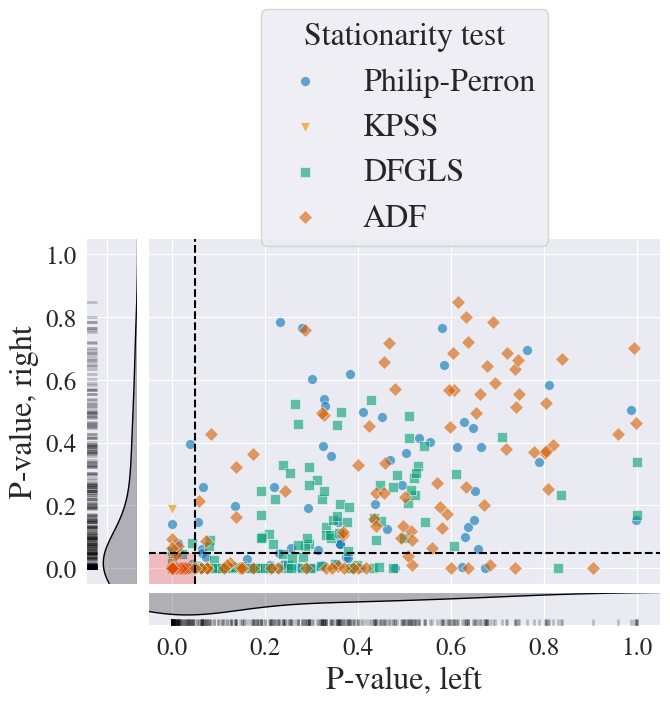

In [66]:
custom_scatterplot(
    df=df,
    dataframes=dataframes,
    path_to_save="../final_visualizations/stationarity_tests-mwc2022.pdf",
    small_fontsize=18,
    medium_fontsize=23,
    large_fontsize=28,
    legend_params=dict(
        loc="center", bbox_to_anchor=(0.5, 1.32), title="Stationarity test"
    ),
)
